# Predicción de Diabetes con regresión logística

<h3>Predicción de la diabetes utilizando regresión logística</h3> <p>La predicción de la diabetes utilizando regresión logística es un proceso en el que se aplica la regresión logística, un algoritmo de aprendizaje automático, para predecir si un individuo tiene diabetes o no. A continuación, se explican los conceptos clave involucrados:</p> <h4>Regresión Logística</h4> <p>La regresión logística es un tipo de modelo de regresión utilizado en problemas de clasificación binaria.</p> <h4>Clasificación Binaria</h4> <p>La clasificación binaria es un tipo de problema de aprendizaje automático en el que se deben tomar decisiones entre dos clases o categorías.</p> <h4>Variables de Entrada</h4> <p>En este tipo de modelo, se utilizan variables de entrada o características para predecir la probabilidad de pertenencia a una categoría.</p> <h4>Probabilidad de Clase</h4> <p>La regresión logística modela la probabilidad de que un individuo pertenezca a una de las dos clases.</p> <h4>Umbral de Decisión</h4> <p>Para hacer una predicción final, se establece un umbral de decisión.</p> <h4>Entrenamiento del Modelo</h4> <p>Antes de utilizar la regresión logística para predecir la diabetes, se entrena el modelo utilizando un conjunto de datos previamente etiquetado.</p> <h4>Evaluación del Modelo</h4> <p>Una vez que el modelo está entrenado, se evalúa su rendimiento utilizando datos de prueba independientes.</p>

### Pasos de este estudio
1. Carga de datos
1. Desarrollo

# 1. Carga de datos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 2. Desarrollo

En esta parte nos interesa explorar los datos y explicar el modelo de regresión logística a este caso de diabetes

## 2.1 Exploración de datos

<h3>1. Carga y Exploración de Datos</h3> <p>Comienza cargando tus datos en un entorno de programación, como Python con bibliotecas como pandas y matplotlib/seaborn para análisis y visualización.</p> <h4>Análisis Exploratorio de Datos</h4> <p>Realiza un análisis exploratorio de datos para comprender la distribución de las variables, identificar valores atípicos y verificar la calidad de los datos.</p> <p>Algunas preguntas clave para responder incluyen:</p> <h5>¿Cuántas muestras (personas) hay en el conjunto de datos?</h5> <h5>¿Cuántas características (variables) están disponibles?</h5> <h5>¿Cuál es la distribución del BMI en la población?</h5> <h5>¿Cuántas personas tienen diabetes (Outcome=1) y cuántas no (Outcome=0)?</h5> <h5>¿Existe alguna correlación evidente entre el BMI y el resultado de diabetes?</h5>

In [7]:
train = pd.read_csv('diabetes.csv')

In [8]:
train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Variables de interes:

<h4>Índice de Masa Corporal (BMI)</h4> <p>El BMI es un índice que se calcula a partir del peso y la altura de una persona. Se utiliza para evaluar la cantidad de grasa corporal en relación con el peso y la altura de una persona. La fórmula típica para calcular el BMI es la siguiente:</p> <p>BMI = Peso (kg) / (Altura (m) * Altura (m))</p> <p>El resultado clasifica a las personas en categorías de peso, como "bajo peso", "normal", "sobrepeso" u "obeso". En el contexto de la predicción de diabetes, un BMI muy alto puede ser un factor de riesgo o indicativo de tener diabetes tipo 2, ya que existe una fuerte correlación entre la obesidad y la diabetes tipo 2.</p> <h4>Outcome (Resultado)</h4> <p>Esta variable binaria indica si una persona tiene diabetes o no. Por lo general, se codifica como "1" para indicar que una persona tiene diabetes y "0" para indicar que una persona no tiene diabetes. Es la variable objetivo en el proceso de predicción. El objetivo principal de un modelo de regresión logística en este contexto sería predecir o clasificar correctamente a las personas en estas dos categorías basadas en otras variables, como el BMI y posiblemente otras características.</p>

<h3>2. Visualización de Datos</h3> <p>Utiliza gráficos y visualizaciones para representar los datos de manera efectiva.</p> <h4>Histograma del BMI</h4> <p>Un histograma del BMI puede mostrar la distribución de valores de este importante predictor.</p> <h4>Gráficos de Barras para el Resultado de Diabetes</h4> <p>Gráficos de barras para el resultado (Outcome) de diabetes pueden ilustrar cuántas personas tienen diabetes (Valor 1) vs no diabetes (Valor 0).</p> <p>Estas visualizaciones pueden proporcionar información valiosa obtenida del análisis exploratorio inicial, como patrones y correlaciones entre variables.</p>

In [ ]:
# Paso 2: Exploración de Datos
# Visualizar las primeras filas del DataFrame
train.head()

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax)

In [ ]:
sns.pairplot(train,hue='Outcome')

In [ ]:
# Visualizar estadísticas descriptivas
train.describe()

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=train, palette="Set3")
plt.title("Age Distribution")

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="BMI", data=train, palette="Set3")
plt.title("BMI Distribution")

In [ ]:
# Visualizar la distribución de BMI
sns.histplot(train['BMI'], bins=30, kde=True)
plt.xlabel('BMI')
plt.title('Distribución de BMI')
plt.show()

In [ ]:
# Visualizar la distribución de BMI
sns.histplot(train['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.title('Distribución de Edades')
plt.show()

In [ ]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# Visualizar la distribución de Outcome con etiquetas descriptivas
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")  # Ajusta el estilo del gráfico

# Crea un gráfico de barras con etiquetas descriptivas
ax = sns.countplot(x="Outcome", data=train, palette="Set1")

plt.xlabel('Resultado de Diabetes', fontsize=14)
plt.ylabel('Número de Personas', fontsize=14)
plt.title('Distribución de Resultados de Diabetes', fontsize=16)

# Añade etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
train.Outcome.value_counts().plot(kind='bar')
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome ")

In [ ]:
# Verificar datos nulos en el DataFrame "train"
nulos = train.isnull().sum()
nulos

In [ ]:
train.info()

<h3>3. Preparación de Datos</h3> <p>Realiza el preprocesamiento de datos, lo que puede incluir:</p> <h4>Normalización de características</h4> <p>Normalizar valores numéricos como el BMI lleva las características a una escala común para mejorar el rendimiento del modelo.</p> <h4>Manejo de valores faltantes</h4> <p>Reemplazar o eliminar registros incompletos para obtener un conjunto de datos limpio.</p> <h4>Codificación de variables categóricas</h4> <p>Si hay variables categorizadas como sexo, codificarlas en valores numéricos understandables por el modelo.</p> <p>Estos pasos preparan los datos de forma apropiada antes de construir e interpretar el modelo de regresión logística.</p>

In [ ]:
# Paso 3: Preparación de Datos (si es necesario)
# Manejo de valores faltantes
data = train.dropna()
data

In [ ]:
data.columns

Miramos una tabla y una gráfica de los datos que nos interesan

In [ ]:
train[['BMI','Outcome']].head()

In [ ]:
train[['BMI','Outcome']].plot.scatter(x='BMI',y='Outcome')

##  Función logística

<h3>4. Modelo de Regresión Logística</h3> <p>Explica el modelo de regresión logística a tu audiencia. Debes resaltar que se trata de un modelo utilizado para predecir la probabilidad de que una persona tenga diabetes (Outcome=1) en función de una o más variables, en este caso, el BMI.</p> <h4>Función logística</h4> <p>La regresión logística utiliza la función logística (sigmoid) para transformar una combinación lineal de las variables predictoras en una probabilidad que varía entre 0 y 1.</p> <h4>Coeficientes de regresión</h4> <p>Los coeficientes de regresión en la regresión logística representan el cambio en el logaritmo de la probabilidad de la variable dependiente (diabetes) asociado a un cambio unitario en la variable independiente (BMI).</p>

### Vamos a pintar una función logistica sobre estos datos

$$ f_{w,b}\left(\vec{x}^{(i)}\right)=\frac{1}{1+\exp^{-\left(w\vec{x}+b\right)}}$$

Donde:

* <p>$f_{w,b}\left(\vec{x}^{(i)}\right)$ es el valor de la función logística para un punto de datos específico $\vec{x}^{(i)}$.</p> 

* <p>$w$ y $b$ son parámetros de la función logística que se pueden ajustar para lograr un mejor ajuste de la función a los datos.</p> 

* <p>$\vec{x}^{(i)}$ representa un punto de datos específico con sus características (por ejemplo, en tu caso, el valor del índice de masa corporal, "BMI").</p>

La función logística toma una combinación lineal de las características de un punto de datos ponderada por $w$ (los coeficientes) y desplazada por $b$ (el sesgo), y luego aplica la función sigmoide ($\frac{1}{1 + \exp(-x)}$) para producir una salida entre 0 y 1. En el contexto de clasificación binaria, esta salida se interpreta generalmente como la probabilidad de que el punto de datos pertenezca a una de las dos clases.

<h4>Ajuste del Modelo</h4>
El objetivo de ajustar esta función logística a tus datos es modelar la relación entre las características (como el BMI) y la variable objetivo (Outcome, que en tu caso representa si una persona tiene diabetes o no). Variando los valores de $w$ y $b, puedes ajustar la función logística para que se ajuste mejor a tus datos y pueda predecir con mayor precisión la probabilidad de tener diabetes en función de la característica del BMI.

Al ajustar estos parámetros, puedes visualizar cómo cambia la función logística y cómo se adapta a tus datos. En esencia, estás explorando cómo diferentes valores de $w$ y $b afectan la capacidad de la función logística para modelar los datos y hacer predicciones precisas. Esto es fundamental en el proceso de entrenar un modelo de regresión logística o cualquier otro modelo de clasificación logística.

In [ ]:
# pruebas de parametro
w = 0.09
b = -3.6

In [ ]:
# despues de hacer el modelos (se explica más adelante)
# intercepto (b): [-3.68596089]
# pendiente (w): [[0.09351691]]

In [ ]:
# puntos de la recta
x = np.linspace(0,train['BMI'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
train.plot.scatter(x='BMI',y='Outcome')
plt.plot(x, y, '-r')
plt.ylim(0,train['Outcome'].max()*1.1)
plt.grid('on')
plt.show()


In [ ]:
# Puntos de la recta
x = np.linspace(0, train['BMI'].max(), 100)
y = 1 / (1 + np.exp(-(w * x + b)))

# Crear un gráfico de dispersión utilizando Seaborn
sns.scatterplot(data=train, x='BMI', y='Outcome')

# Trazar la recta logística
plt.plot(x, y, '-r')

# Establecer límites del eje y
plt.ylim(0, train['Outcome'].max() * 1.1)

# Activar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


## 2.3 Optimización de parámetros

Si escogemos esos parametros $w,b$ para el modelo, ¿Qué tan buenos son?

Podemos utilizar la siguiente estrategia:
* calcular el valor de la función logística para cada dato
* calcular la función de pérdida (se denota con L o loss)
* calcular el promedio de la pérdida para obtener el costo (se denota con Jo cost)

Queremos los valores $w,b$ que resulten en un menor costo

Las ecuaciones para las funciones son

$$ L\left(f_{w,b}\left(\vec{x}^{(i)}\right),y^{(i)}\right)=-y^{(i)}\log\left(f_{w,b}\left(\vec{x}^{(i)}\right)\right)-\left(1-y^{(i)}\right)\log\left(1-f_{w,b}\left(\vec{x}^{(i)}\right)\right) $$

$$ J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left[L\left(f_{w,b}\left(\vec{x}^{(i)}\right),y^{(i)}\right)\right] $$


In [ ]:
# calculo de las predicciones
train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))

# calculo de la funcion de error
train['loss_xi'] = -train['Outcome']*np.log(train['sigmoid'])-(1-train['Outcome'])*np.log(1-train['sigmoid'])
cost_j = train['loss_xi'].mean()
cost_j

Esto lo hemos hecho con los parametros que hemos obtenido a ojo por ciento. Ahora vamos a ser más refinados y calcularlo para muchos parametros a la vez y luego de ahi mirar el que tenga menor costo.

Para eso hacemos lo siguiente:
* Construimos un dataframe con valores para $w,b$ que varían sobre una cuadricula o grid
* Creamos una función de python que calcule el costo $J$ dados parametros $w,b$
* Aplicamos la función sobre el dataframe con los valores $w,b$ en la cuadricula
* Podemos ordenar la tabla resultante para obtener los valores $w,b$ con el menor costo
* Luego hacemos gráficas para verificar el resultado

In [ ]:
# hacemos dataframe para calcular el error en funcion de los parametros w, b

In [ ]:
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [ ]:
df

In [ ]:
def sum_error_df(df):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*df['w']+df['b'])))
    train['loss_xi'] = -train['Outcome']*np.log(train['sigmoid'])-(1-train['Outcome'])*np.log(1-train['sigmoid'])
    j_cost = train['loss_xi'].mean()
    return(j_cost)

In [ ]:
df['error'] = df.apply(sum_error_df, axis=1)

In [ ]:
df.sort_values(by=['error']).head()

In [ ]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [ ]:
df_3d.head()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

In [ ]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

## Bonus: Optimizando los parámetros

Esta sección es opcional.

Vamos a utilizar el método del gradiente descendente para calcular los valores optimos de $w,b$.

Para esto tenemos que calcular el gradiente para $w,b$ con respecto de la función J (esta es la que hemos gráficado), sus funciones son

$$ \frac{\partial}{\partial w}J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left(f_{w,b}\left(\vec{x}^{(i)}\right)-y^{(i)}\right)x^{(i)} $$

$$ \frac{\partial}{\partial b}J\left(w,b\right)=\frac{1}{m}\sum_{i=1}^{m}\left(f_{w,b}\left(\vec{x}^{(i)}\right)-y^{(i)}\right)$$

Las funciones respectivas en python serían

In [ ]:
def delta_j_w(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['Outcome'])*train['BMI']
    derivative = train['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    train['sigmoid'] = 1/(1+np.exp(-(train['BMI']*w+b)))
    train['partial_loss'] = (train['sigmoid']-train['Outcome'])
    derivative = train['partial_loss'].mean()
    return(derivative) 

Damos valores iniciales a $w,b$

In [ ]:
w_0 = 0.09
b_0 = -3.57

Empezamos a iterar hasta obtener valores que no varíen tanto

In [ ]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

In [ ]:
# valores optimos de sklearn (más abajo la explicación)
# w = 0.09351691
# b = -3.68596089

<h3>5. Entrenamiento del Modelo</h3> <h4>División de Conjunto de Datos</h4> <p>Divide el conjunto de datos en conjuntos de entrenamiento y prueba.</p> <h4>Ajuste del Modelo</h4> <p>Entrena el modelo de regresión logística utilizando el conjunto de entrenamiento. Ajusta los hiperparámetros, como la regularización si es necesario.</p>

Ahora vamos a hacer lo mismo pero mucho más rápido con sklearn

<h3>División Train-Test</h3> <p>Algunos principios generales para considerar al elegir el tamaño de la división entre train y test son los siguientes:</p> <h4>Tamaño de Muestra Total</h4> <p>El tamaño total de la muestra de datos que tienes a tu disposición es importante. Si tienes una gran cantidad de datos, puedes permitirte usar un porcentaje más pequeño para el conjunto de prueba. Si tienes pocos datos, querrás usar un porcentaje más grande para el conjunto de prueba para garantizar una evaluación significativa del modelo.</p> <h4>Deseo de Generalización</h4> <p>Si deseas que tu modelo generalice bien a datos futuros no vistos, es importante mantener un conjunto de prueba lo suficientemente grande. Un conjunto de prueba más grande proporcionará una mejor evaluación de cómo se desempeñará el modelo en el mundo real.</p> <h4>Overfitting y Underfitting</h4> <p>Un conjunto de prueba más grande ayuda a evaluar si tu modelo está sobreajustado (overfitting) o subajustado (underfitting). Si el conjunto de prueba es muy pequeño en comparación con el conjunto de entrenamiento, puedes obtener una evaluación sesgada del rendimiento del modelo.</p> <h4>K-Fold Cross-Validation</h4> <p>En lugar de una única división train/test, considera utilizar validación cruzada (cross-validation) k-fold. Esto implica dividir los datos en k subconjuntos y realizar k evaluaciones diferentes del modelo. Esto puede ser útil si tienes una cantidad limitada de datos.</p> <h4>Reglas comunes</h4> <p>A menudo, se utilizan divisiones comunes como 70-30 (70% de train, 30% de test) o 80-20 (80% de train, 20% de test) en muchos casos. Sin embargo, no hay reglas estrictas y estos porcentajes pueden variar.</p> <h4>Contexto del Proyecto</h4> <p>Finalmente, el tamaño de la división también depende del contexto del proyecto. Algunos proyectos pueden requerir una evaluación más estricta, mientras que otros pueden ser más tolerantes a errores. Considera tus objetivos y requisitos específicos.</p>

In [ ]:
X = data[['BMI']]  # Agrega más características
y = data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = LogisticRegression()  

model.fit(X_train, y_train)

In [ ]:
#Paso 6: Evaluación del Modelo
y_pred = model.predict(X_test)

## Métricas de evaluación

<h3>Evaluación del Modelo</h3> <p>"La Evaluación del Modelo" es una etapa crítica en el proceso de construir y validar modelos de aprendizaje automático. En el contexto de un modelo de predicción de diabetes utilizando regresión logística, estas métricas juegan un papel fundamental en la comprensión de qué tan bien el modelo realiza sus predicciones. A continuación, se explica el significado de algunas de las métricas de clasificación comunes mencionadas:</p> <h4>Precisión (Accuracy)</h4> <p>La precisión es una métrica que mide la proporción de predicciones correctas (verdaderos positivos y verdaderos negativos) en relación con el número total de predicciones. Es una métrica general que proporciona una idea de cuán bien el modelo clasifica en general.</p> <h4>Sensibilidad (Recall)</h4> <p>También conocida como tasa de verdaderos positivos o tasa positiva real, la sensibilidad mide la proporción de casos positivos reales (en este contexto, personas con diabetes) que se predicen correctamente como positivos. Una alta sensibilidad es importante cuando se desea identificar a todas las personas con diabetes, para evitar falsos negativos.</p> <h4>Especificidad (Specificity)</h4> <p>La especificidad mide la proporción de casos negativos reales (personas sin diabetes) que se predicen correctamente como negativos. Es importante cuando se busca minimizar los falsos positivos.</p> <h4>Curva ROC (Receiver Operating Characteristic)</h4> 
<p>Representa la sensibilidad frente a (1 - especificidad) para diferentes umbrales de clasificación. Mide la capacidad de clasificación del modelo.</p>
<p>La curva ROC es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a través de varios umbrales de clasificación. Cuanto más se acerca la curva ROC al vértice superior izquierdo, mejor es el modelo.</p> 

<h4>Precisión del Modelo (Accuracy)</h4> <p>La precisión es la proporción de predicciones correctas en el conjunto de datos de prueba.</p>

In [ ]:
# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

 En este caso, el modelo tiene una precisión del 66.23%, lo que significa que el 66.23% de las predicciones del modelo son correctas.

<h3>Matriz de Confusión</h3> <p>La matriz de confusión muestra cómo se comparan las predicciones del modelo con los valores reales.</p>

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un gráfico de matriz de confusión más claro
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

<h4>Precisión del Modelo Desglosada</h4> <p>La precisión del modelo se organiza de la siguiente manera:</p> <h5>Verdaderos positivos (True Positives - TP)</h5> <p>12 casos donde el modelo predijo diabetes (1) correctamente.</p> <h5>Falsos positivos (False Positives - FP)</h5> <p>9 casos donde el modelo predijo diabetes incorrectamente.</p> <h5>Verdaderos negativos (True Negatives - TN)</h5> <p>90 casos donde el modelo predijo no diabetes (0) correctamente.</p> <h5>Falsos negativos (False Negatives - FN)</h5> <p>43 casos donde el modelo predijo no diabetes incorrectamente.</p>

<h4>Puntuación AUC-ROC</h4> <p>La puntuación AUC-ROC (Área bajo la Curva ROC) mide la capacidad del modelo para distinguir entre clases. Cuanto más cerca esté la puntuación de 1, mejor es el modelo.</p>

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Puntuación AUC-ROC: {roc_auc}")

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Muestra la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.show()


la puntuación es 0.564, lo que indica un rendimiento relativamente bajo en la distinción entre clases.

<h3>Informe de Clasificación</h3>
El informe de clasificación proporciona métricas adicionales, incluyendo:

<h5>Precisión</h5> <p>La proporción de predicciones positivas correctas (tanto verdaderos positivos como falsos positivos).</p> <h5>Recall (Sensibilidad)</h5> <p>La proporción de casos positivos reales (diabetes) que se predicen correctamente.</p> <h5>F1-score</h5> <p>La media armónica de precisión y recall. Es útil cuando se busca un equilibrio entre precisión y recall.</p> <h5>Support</h5> <p>El número de muestras en cada clase.</p>

In [ ]:
# Generar el informe de clasificación
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])

# Presentar el informe de clasificación de manera más clara
print("Informe de Clasificación:")
print(report)


<h3>Informe de Clasificación</h3> <h4>Precision (Precisión)</h4> <p>"Precision" para "No Diabetes" (clase negativa): 0.68</p> <p>"Precision" para "Diabetes" (clase positiva): 0.57</p> <p>Interpretación: La precisión mide la proporción de predicciones positivas que son realmente correctas. En el caso de "No Diabetes", el 68% de las predicciones de "No Diabetes" son correctas, y en el caso de "Diabetes", el 57% de las predicciones de "Diabetes" son correctas.</p> <h4>Recall (Sensibilidad)</h4> <p>"Recall" para "No Diabetes" (clase negativa): 0.91</p> <p>"Recall" para "Diabetes" (clase positiva): 0.22</p> <p>Interpretación: El "Recall" mide la proporción de casos reales de una clase que se han predicho correctamente. En el caso de "No Diabetes", el 91% de las personas que realmente no tienen diabetes se predicen correctamente como "No Diabetes", mientras que en el caso de "Diabetes", solo el 22% de las personas que realmente tienen diabetes se predicen correctamente como "Diabetes".</p> <h4>F1-Score (Puntuación F1)</h4> <p>"F1-Score" para "No Diabetes" (clase negativa): 0.78</p> <p>"F1-Score" para "Diabetes" (clase positiva): 0.32</p> <p>Interpretación: El "F1-Score" es una métrica que combina precision y recall en una sola puntuación. Proporciona un equilibrio entre precision y recall. En el caso de "No Diabetes", el "F1-Score" es 0.78, y en el caso de "Diabetes", el "F1-Score" es 0.32.</p> <h4>Support (Soporte)</h4> <p>"Support" para "No Diabetes" (clase negativa): 99</p> <p>"Support" para "Diabetes" (clase positiva): 55</p> <p>Interpretación: El "Support" muestra el número de muestras de datos en cada clase. Hay 99 muestras de "No Diabetes" y 55 muestras de "Diabetes" en el conjunto de prueba.</p> <h4>Accuracy (Precisión Global)</h4> <p>Accuracy (Precisión Global): 0.66</p> <p>Interpretación: La precisión global mide la proporción de todas las predicciones correctas en el conjunto de prueba. En este caso, el modelo tiene una precisión global del 66%, lo que significa que el 66% de todas las predicciones son correctas.</p> <h4>Macro Avg y Weighted Avg</h4> <p>Macro Avg: Calcula el promedio de las métricas para cada clase por separado y luego toma el promedio de esos promedios.</p> <p>Weighted Avg: Calcula el promedio de las métricas para cada clase, pero ponderando cada métrica por el número de muestras en cada clase.</p>

In [ ]:
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

### Resumen: 
El modelo tiene una precisión moderada del 66.23%, lo que indica que acierta en alrededor del 66.23% de las predicciones. Sin embargo, el recall (sensibilidad) para la clase "1" (diabetes) es bajo, lo que significa que el modelo no es muy bueno para identificar personas con diabetes. Esto puede deberse a un desequilibrio en la distribución de clases en los datos o a otras consideraciones.

In [ ]:
# Paso 7: Interpretación del Modelo
coeficientes = model.coef_[0]
intercepto = model.intercept_[0]

print(f"Coeficientes: {coeficientes}")
print(f"Intercepto: {intercepto}")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que estamos interesados en el primer coeficiente (coeficientes[0])
feature_name = "BMI"  # Nombre de la característica asociada al coeficiente

# Crear un rango de valores para BMI
bmi_range = np.linspace(train[feature_name].min(), train[feature_name].max(), 100)

# Calcular las probabilidades usando los coeficientes e intercepto
probabilities = 1 / (1 + np.exp(-(coeficientes[0] * bmi_range + intercepto)))

# Crear un gráfico para visualizar la relación entre BMI y la probabilidad de diabetes
plt.figure(figsize=(8, 6))
sns.lineplot(x=bmi_range, y=probabilities, label="Probabilidad de Diabetes")
plt.xlabel("BMI")
plt.ylabel("Probabilidad")
plt.title(f"Relación entre {feature_name} y la Probabilidad de Diabetes")
plt.legend()
plt.show()



## Paso 9: Mejora y Afinación del Modelo (Opcional)

In [ ]:

# Exploración y preprocesamiento de datos (puedes realizar más preprocesamiento según sea necesario)

# División de datos en características (X) y etiquetas (y)
X = data[['BMI', 'Glucose', 'BloodPressure']]  # Agrega más características
y = data['Outcome']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afinación de hiperparámetros (ajusta los hiperparámetros según sea necesario)
model = LogisticRegression(C=1.0, penalty='l2')  # Experimenta con diferentes valores de C y tipo de regularización

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Presentación de resultados
print(f"Precisión del modelo: {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print(f"Puntuación AUC-ROC: {roc_auc:.2f}")

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:

# Exploración y preprocesamiento de datos (puedes realizar más preprocesamiento según sea necesario)

# División de datos en características (X) y etiquetas (y)
X = data[['BMI', 'Glucose', 'BloodPressure','Age']]  # Agrega más características
y = data['Outcome']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afinación de hiperparámetros (ajusta los hiperparámetros según sea necesario)
model = LogisticRegression(C=1.0, penalty='l2')  # Experimenta con diferentes valores de C y tipo de regularización

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Presentación de resultados
print(f"Precisión del modelo: {accuracy:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)
print(f"Puntuación AUC-ROC: {roc_auc:.2f}")

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
data.columns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# División de datos en características (X) y etiquetas (y)
X = data[['BMI', 'Glucose', 'BloodPressure']]
#X = data[['BMI']]
y = data['Outcome']

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo Random Forest para calcular la importancia de características
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Obtener la importancia de características
feature_importance = rf_model.feature_importances_
print("Importancia de características:")
for i, importance in enumerate(feature_importance):
    print(f"Característica {i}: {importance:.4f}")


In [ ]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con k-fold
cv_scores = cross_val_score(model, X, y, cv=5)
print("Puntuaciones de validación cruzada:", cv_scores)
print(f"Puntuación media de validación cruzada: {cv_scores.mean():.2f}")


## Classification using KNN

<h4>Creación del conjunto de datos de características X</h4> <p>El código `train.drop('Outcome', axis=1)` se utiliza para crear un nuevo DataFrame llamado X que contiene todas las características (atributos) del conjunto de datos original excepto la columna 'Outcome'. Es decir, se eliminó la columna 'Outcome' del conjunto de datos original y se guardó el resto de las columnas en X.</p>

In [9]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X=train.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<h4>Creación de la Serie de etiquetas y</h4> <p>El código y = train['Outcome'] se utiliza para crear una Serie y que contiene las etiquetas (resultados) del conjunto de datos original. Es decir, se está extrayendo la columna 'Outcome' del DataFrame original y guardándola en la Serie y.</p>

In [11]:
y=train['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


In [13]:
X_train.shape

(614, 8)

<h4>Creación del transformador StandardScaler</h4> <p>La línea StandardScaler() se utiliza para crear una instancia del transformador StandardScaler de la biblioteca scikit-learn. 
    
El StandardScaler es una técnica de preprocesamiento común en el aprendizaje automático que se utiliza para estandarizar (escalar) las características de un conjunto de datos.
    
 Esta estandarización hace que las características tengan una media de 0 y una desviación estándar de 1, lo que puede ser beneficioso para ciertos algoritmos de aprendizaje automático, como K-Nearest Neighbors (KNN).</p>

In [14]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

## KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
knn.score(X_test,y_test)

0.7987012987012987

In [21]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [22]:
metrics.accuracy_score(y_test,y_pred)

0.7987012987012987

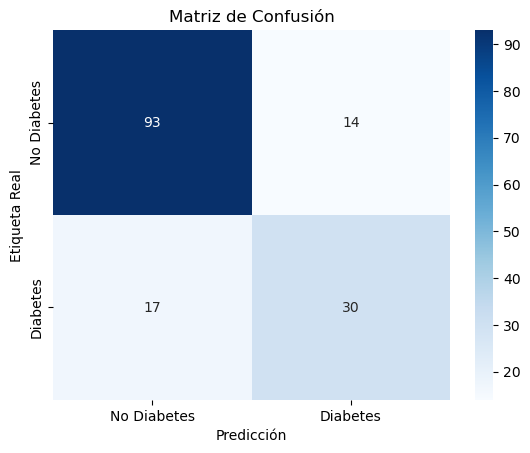

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calcula la matriz de confusión
mat = confusion_matrix(y_test, y_pred)

# Crea un mapa de calor de la matriz de confusión
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])

# Personaliza las etiquetas de los ejes
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')

# Muestra el gráfico
plt.show()


In [24]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

    Diabetes       0.85      0.87      0.86       107
      Normal       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



In [25]:
#For selecting K value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

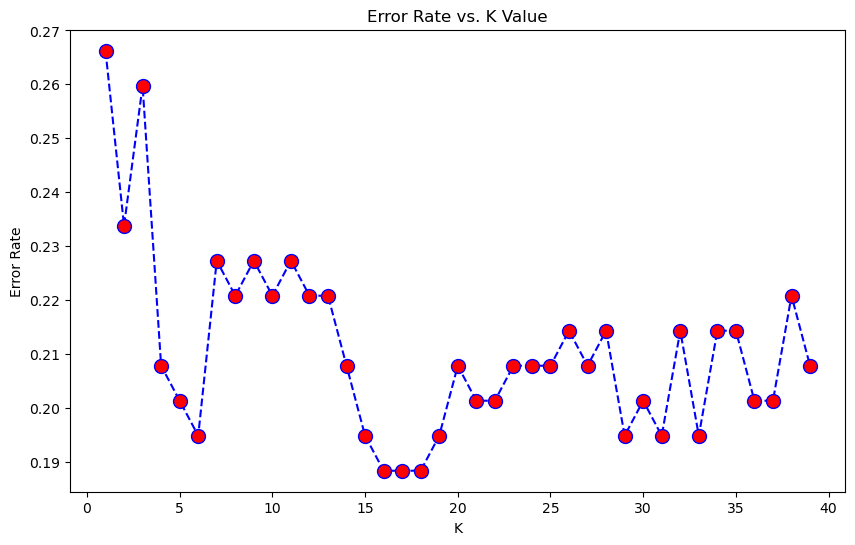

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')



In [29]:
knn=KNeighborsClassifier(n_neighbors=18,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [30]:
y_pred=knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
knn.score(X_test,y_test)

0.8116883116883117

<Axes: >

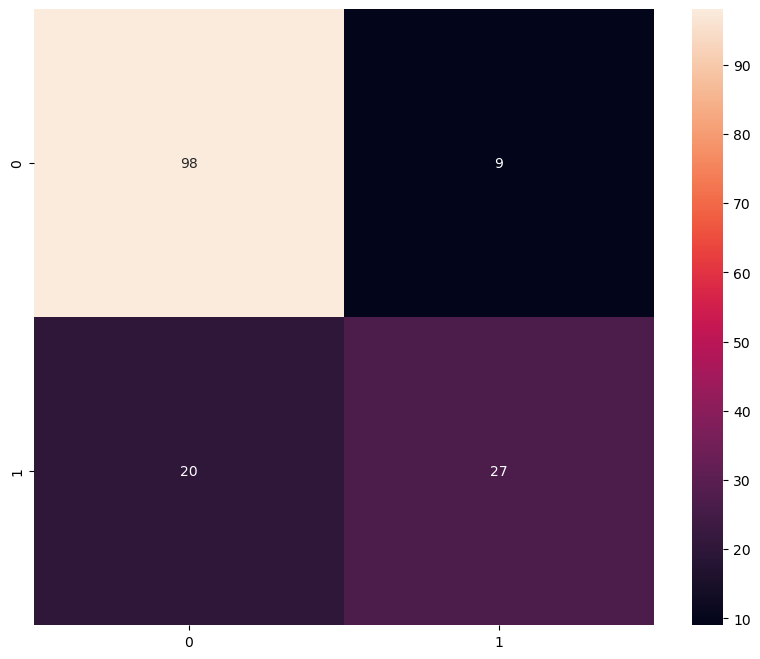

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [34]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.83      0.92      0.87       107
      Normal       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154

